INF8770 Technologies multimédias

Polytechnique Montréal

Exemple d'utilisation de SIFT

In [1]:
import cv2
import matplotlib.pyplot as plt
import imutils

Lecture de deux images tests et affichage.

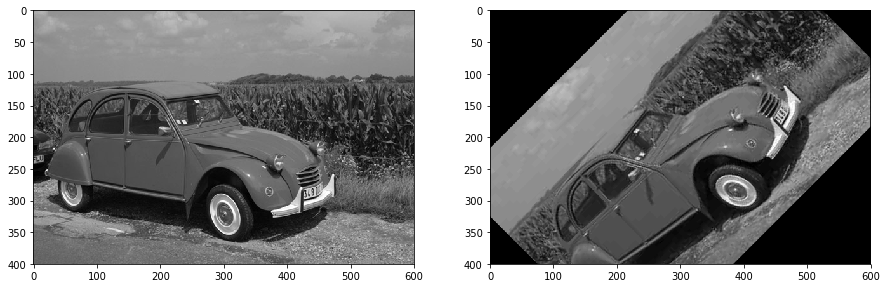

In [2]:
image = cv2.imread('RGB.jpg',cv2.IMREAD_GRAYSCALE)
imagemodif = cv2.imread('RGBBlocs.jpg',cv2.IMREAD_GRAYSCALE) 
imagemodif = imutils.rotate(imagemodif, 45) #Image bruitée + tournée de 45 deg. 

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image,cmap = plt.get_cmap('gray'))
axarr[1].imshow(imagemodif,cmap = plt.get_cmap('gray'))
plt.show()

Extraction des points clefs sur les images. Certains points clefs ont deux orientations.

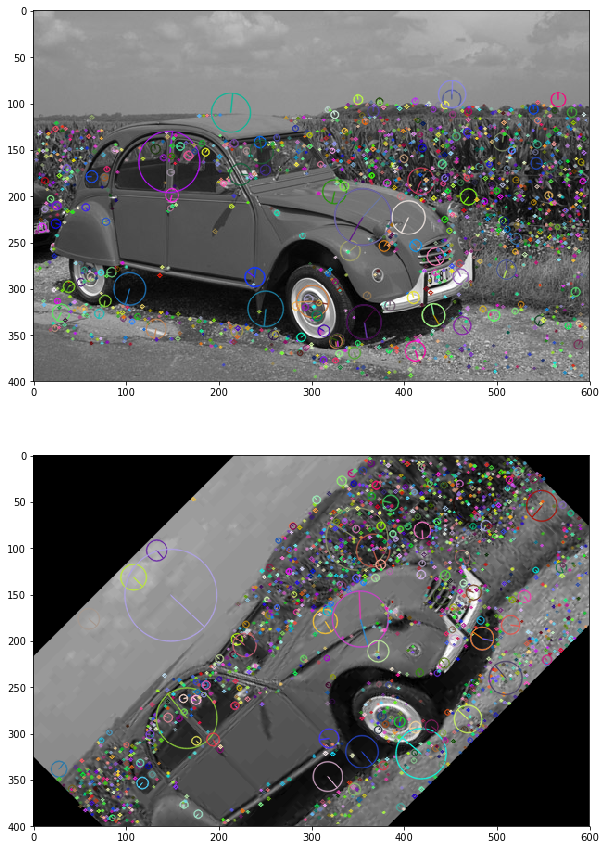

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
pointsclefs1 = sift.detect(image,None)
pointsclefs2 = sift.detect(imagemodif,None)

#Le cercle représente l'échelle, et la ligne l'angle.
imageout1 = cv2.drawKeypoints(image,pointsclefs1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imageout2 = cv2.drawKeypoints(imagemodif,pointsclefs2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f, axarr = plt.subplots(2, 1, figsize=(15,15))
axarr[0].imshow(imageout1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(imageout2,cmap = plt.get_cmap('gray'))
plt.show()

Description des points clefs.

In [4]:
_, descripteurs1 = sift.compute(image,pointsclefs1)
_, descripteurs2 = sift.compute(imagemodif,pointsclefs2)

Mise en correspondance des points.

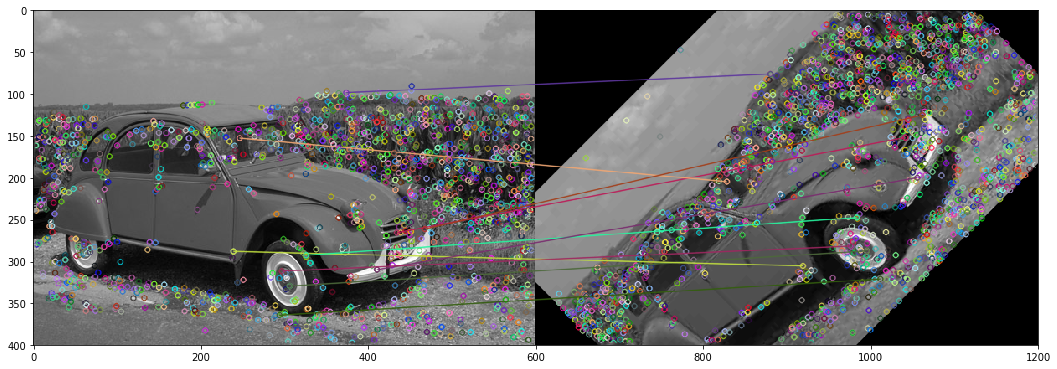

In [5]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
correspondances = bf.match(descripteurs1,descripteurs2)
correspondances = sorted(correspondances, key = lambda x:x.distance) #On affichera seulement quelques correspondances
plt.figure(figsize = (18,10))
imageout3 = cv2.drawMatches(image,pointsclefs1,imagemodif,pointsclefs2,correspondances[0:10],2, None)
plt.imshow(imageout3)
plt.show()

On note qu'on peut faire des correspondances, malgré le bruit et la rotation. 